In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
from scipy.special import entr, rel_entr
import math
import sympy
from sympy import Symbol
sympy.init_printing()

In [2]:
#ex 8.6
P = [
    1./8,1./16,1./32,1./32,
    1./16,1./8,1./32,1./32,
    1./16,1./16,1./16,1./16,
    1./4,0.,0.,0.,]
P = np.asarray(P).reshape((4,4))
assert(np.sum(P) == 1)
Py = np.sum(P, axis = 1)
Px = np.sum(P, axis = 0)
Py,Px

(array([ 0.25,  0.25,  0.25,  0.25]), array([ 0.5  ,  0.25 ,  0.125,  0.125]))

In [3]:
#Px conditional on y
def conditional(Pxy):
    P = np.copy(Pxy)
    for i in range(P.shape[0]):
        pY = np.sum(P[i,:])
        P[i,:]  /= pY
    return P
def conditional_information(pxy, pxcond_y):
    if pxcond_y == 0.:
        return 0
    return -pxy*math.log2(pxcond_y)
def conditional_entropy(Pxy):
   #sum P(x,y) -log p(X|Y)
    x_given_y = conditional(Pxy).reshape(-1)
    joint = Pxy.reshape(-1)
    sum = 0.
    for i in range(joint.shape[0]):
        sum += conditional_information(joint[i], x_given_y[i])
    return sum


In [4]:
H_XY = entropy(P.reshape(-1), base=2)
H_X,H_Y = entropy(Px, base=2), entropy(Py, base=2)
H_X_cond_Y, H_Y_cond_X = conditional_entropy(P),conditional_entropy(P.transpose())
print('H(X,Y) =',H_XY)
print('H(X) =', H_X, 'H(Y)=', H_Y)
print('H(X|Y) =', H_X_cond_Y, 'H(Y|X) =', H_Y_cond_X) 
print('I(X;Y) = ', H_X - H_X_cond_Y, 'I(Y;X) = ', H_Y - H_Y_cond_X)

x_cond_y = conditional(P)
for i in range(x_cond_y.shape[0]):
    #print(x_cond_y[i,:])
    print('H(X|Y=',i+1,') = ', entropy(x_cond_y[i,:], base=2))    

H(X,Y) = 3.375
H(X) = 1.75 H(Y)= 2.0
H(X|Y) = 1.375 H(Y|X) = 1.625
I(X;Y) =  0.375 I(Y;X) =  0.375
H(X|Y= 1 ) =  1.75
H(X|Y= 2 ) =  1.75
H(X|Y= 3 ) =  2.0
H(X|Y= 4 ) =  0.0


In [5]:
p,q,z = Symbol('p'),Symbol('q'), Symbol('z')

def equ():
    z = p*q + (1-p)*(1-q)
    return z
#(a)
z = float(equ().subs('q',0.5).evalf())
print ('Pz = ', z, 1-z)
#H(Z|X) = H(Z)
Izx = entropy([z,1-z], base=2) - entropy([z,1-z], base=2) 
print('I(Z;X) =', Izx)
#(b)
#H(Z|X) = H(Q) --> I(Z;X) = H(Z) - H(Y)

Pz =  0.5 0.5
I(Z;X) = 0.0


In [46]:
def bsc(p0,f):
    _bsc = [p0*(1-f), (1-p0)*f, p0*(f), (1-p0)*(1-f)]
    _bsc = np.asarray(_bsc).reshape((2,2))
    return _bsc
def Zchannel(p0,f):
    _z = [p0,(1-p0)*f,0, (1-p0)*(1-f)]
    _z =np.asarray(_z).reshape((2,2))
    return _z
#Ex 9.7
p0 = 0.5
f = 0.15
XY = bsc(p0,f)
X = np.sum(XY, axis = 0)
Y = np.sum(XY, axis = 1)
H_X = entropy(X, base=2)
H_X_cond_Y = conditional_entropy(XY)
print('BSC: I(X:Y) =', H_X - H_X_cond_Y)

#ex 9.8
XY = Zchannel(p0,f)
X = np.sum(XY, axis = 0)
Y = np.sum(XY, axis = 1)
H_X = entropy(X, base=2)
H_X_cond_Y = conditional_entropy(XY)
print('zchannel: I(X:Y) =', H_X - H_X_cond_Y)

BSC: I(X:Y) = 0.390159695284
zchannel: I(X:Y) = 0.678788110265


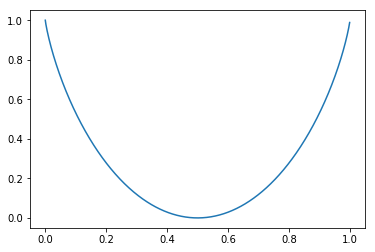

In [51]:
#ex 9.12
f = np.arange(0.0,1,0.001)
y = []
for p in f:
    y.append(1 - entropy([p,1-p], base=2))
plt.plot(f,y)
plt.show()

In [85]:
#9.13
def bec(p0,f):
    _bec = [p0*(1-f), 0, p0*(f), (1-p0)*(f),0, (1-p0)*(1-f)]
    _bec = np.asarray(_bec).reshape((3,2))
    return _bec
#capacity --> p =0.5 due to symetry argument
f = 0.15
Qbec = bec(0.5, f)
X = np.sum(Qbec, axis = 0)
Y = np.sum(Qbec, axis = 1)
H_X = entropy(X, base=2)
H_X_cond_Y = conditional_entropy(Qbec)
print('CBEC =', H_X - H_X_cond_Y)
#Capacity (f) = f --> H(Y |X) = [0, f, 0]


CBEC = 0.85
